In [1]:
import os
import pandas as pd
import numpy as np
import datetime

import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3

pd.set_option('display.max_columns', 500)

In [2]:
if not os.path.isdir("./data"):
    os.makedirs("./data")

In [3]:
!gsutil cp -r gs://qwiklabs-gcp-00-f6858b4e5c0c/energy_forecasting/* ./data/ 

Copying gs://qwiklabs-gcp-00-f6858b4e5c0c/energy_forecasting/LD2011_2014.txt...
Copying gs://qwiklabs-gcp-00-f6858b4e5c0c/energy_forecasting/RealMarketPriceData.csv...
Copying gs://qwiklabs-gcp-00-f6858b4e5c0c/energy_forecasting/WeatherHistoricalData.zip...
Copying gs://qwiklabs-gcp-00-f6858b4e5c0c/energy_forecasting/portugal_holidays.csv...
/ [4 files][683.0 MiB/683.0 MiB]   55.4 MiB/s                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://qwiklabs-gcp-00-f6858b4e5c0c/energy_forecasting/ECA_blended_custom_max/TX_STAID000212.txt...
Copying gs://qwiklabs-gcp-00-f6858b4e5c0c/energy_forecasting/ECA_blended_custom_max/elements.txt...
Copying gs://qwiklabs-gcp-00-f6858b4e5c0c/energy_forecasting/ECA_blended_custom_max/metadata.txt...
Copying gs://qwik

#### Read in data from ./data/LD2011_2014.txt

In [2]:
COL_NAMES = ['portuguese_datetime'] + [f'MT_{str(i).zfill(3)}' for i in range(1, 371)]

df = pd.read_csv('./data/LD2011_2014.txt', sep=';', dtype=str, na_values='0')
df.columns = COL_NAMES
print(df.shape)
df.head()

(140256, 371)


,portuguese_datetime,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"71,7703349282297",NaN,NaN,NaN,NaN,NaN,NaN,"260,416666666667","45,7217504898759",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"68,203368683718",NaN,"38,3422459893048","20,3639846743295",NaN,"1935,18518518519","158,006362672322","1965,43778801843",NaN,NaN,"838,461538461538",NaN,"50,7562076749436","24,5706051873199",NaN,"137,885196374622","80,7970112079701",NaN,"74,5622119815668","76,7927631578947","41,4825870646766",NaN,NaN,NaN,"93,2917316692668",NaN,"39,5888594164456","45,7174556213018",NaN,NaN,NaN,"13,4228187919463","22,123745819398","205,83596214511","327,859237536657","920,863309352518","285,607755406413","266,521026761333","1826,27118644068","218,274111675127","12166,6666666667","76,6129032258064","148,867313915858","272,935779816514","428,4140969163","173,089071383449","235,492957746479","319,354838709677","447,

#### Cleaning: Step 1
- convert portuguese_datetime to datetime dtype
- replace commas w/ decimals and convert to floats
- create new column indicating if energy consumption was missing at that timepoint
- forward-fill (ff) missing values in energy columns

In [3]:
# convert portuguese_datetime to datetime dtype
df['portuguese_datetime'] = pd.to_datetime(df['portuguese_datetime'])

# for energy columns replace commas w/ decimals and convert to floats
cols = [f'MT_{str(i).zfill(3)}' for i in range(1, 371)]
df[cols] = df[cols].replace(',', '.', regex=True).astype(float)

# create new column indicating if energy consumption was missing at that timepoint
ff_indicator_df = df[cols].isnull()
ff_indicator_df.columns = [f'MT_{str(i).zfill(3)}_ffval' for i in range(1, 371)]
df = pd.concat([df, ff_indicator_df], axis=1).copy()

# forward-fill missing values in energy columns
df[cols] = df[cols].ffill()

In [4]:
df.head()

,portuguese_datetime,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,...,MT_121_ffval,MT_122_ffval,MT_123_ffval,MT_124_ffval,MT_125_ffval,MT_126_ffval,MT_127_ffval,MT_128_ffval,MT_129_ffval,MT_130_ffval,MT_131_ffval,MT_132_ffval,MT_133_ffval,MT_134_ffval,MT_135_ffval,MT_136_ffval,MT_137_ffval,MT_138_ffval,MT_139_ffval,MT_140_ffval,MT_141_ffval,MT_142_ffval,MT_143_ffval,MT_144_ffval,MT_145_ffval,MT_146_ffval,MT_147_ffval,MT_148_ffval,MT_149_ffval,MT_150_ffval,MT_151_ffval,MT_152_ffval,MT_153_ffval,MT_154_ffval,MT_155_ffval,MT_156_ffval,MT_157_ffval,MT_158_ffval,MT_159_ffval,MT_160_ffval,MT_161_ffval,MT_162_ffval,MT_163_ffval,MT_164_ffval,MT_165_ffval,MT_166_ffval,MT_167_ffval,MT_168_ffval,MT_169_ffval,MT_170_ffval,MT_171_ffval,MT_172_ffval,MT_173_ffval,MT_174_ffval,MT_175_ffval,MT_176_ffval,MT_177_ffval,MT_178_ffval,MT_179_ffval,MT_180_ffval,MT_181_ffval,MT_182_ffval,MT_183_ffval,MT_184_ffval,MT_185_ffval,MT_186_ffval,MT_187_ffval,MT_188_ffval,MT_189_ffval,MT_190_ffval,MT_191_ffval,MT_192_ffval,MT_193_ffval,MT_194_ffval,MT_195_ffval,MT_196_ffval,MT_197_ffval,MT_198_ffval,MT_199_ffval,MT_200_ffval,MT_201_ffval,MT_202_ffval,MT_203_ffval,MT_204_ffval,MT_205_ffval,MT_206_ffval,MT_207_ffval,MT_208_ffval,MT_209_ffval,MT_210_ffval,MT_211_ffval,MT_212_ffval,MT_213_ffval,MT_214_ffval,MT_215_ffval,MT_216_ffval,MT_217_ffval,MT_218_ffval,MT_219_ffval,MT_220_ffval,MT_221_ffval,MT_222_ffval,MT_223_ffval,MT_224_ffval,MT_225_ffval,MT_226_ffval,MT_227_ffval,MT_228_ffval,MT_229_ffval,MT_230_ffval,MT_231_ffval,MT_232_ffval,MT_233_ffval,MT_234_ffval,MT_235_ffval,MT_236_ffval,MT_237_ffval,MT_238_ffval,MT_239_ffval,MT_240_ffval,MT_241_ffval,MT_242_ffval,MT_243_ffval,MT_244_ffval,MT_245_ffval,MT_246_ffval,MT_247_ffval,MT_248_ffval,MT_249_ffval,MT_250_ffval,MT_251_ffval,MT_252_ffval,MT_253_ffval,MT_254_ffval,MT_255_ffval,MT_256_ffval,MT_257_ffval,MT_258_ffval,MT_259_ffval,MT_260_ffval,MT_261_ffval,MT_262_ffval,MT_263_ffval,MT_264_ffval,MT_265_ffval,MT_266_ffval,MT_267_ffval,MT_268_ffval,MT_269_ffval,MT_270_ffval,MT_271_ffval,MT_272_ffval,MT_273_ffval,MT_274_ffval,MT_275_ffval,MT_276_ffval,MT_277_ffval,MT_278_ffval,MT_279_ffval,MT_280_ffval,MT_281_ffval,MT_282_ffval,MT_283_ffval,MT_284_ffval,MT_285_ffval,MT_286_ffval,MT_287_ffval,MT_288_ffval,MT_289_ffval,MT_290_ffval,MT_291_ffval,MT_292_ff

In [5]:
start_time = pd.to_datetime('2012-12-25 08:00:00')
end_time = pd.to_datetime('2013-01-25 08:00:00')
cols = ['portuguese_datetime', 'MT_001', 'MT_001_ffval']

mask = (df['portuguese_datetime'].between(start_time, end_time))

df[cols][mask].head(5)

,portuguese_datetime,MT_001,MT_001_ffval
69535,2012-12-25 08:00:00,1.269036,False
69536,2012-12-25 08:15:00,2.538071,False
69537,2012-12-25 08:30:00,2.538071,True
69538,2012-12-25 08:45:00,1.269036,False
69539,2012-12-25 09:00:00,1.269036,True


#### Create periods DataFrame to join to energy DataFrame 

In [6]:
periods_df = pd.DataFrame({
    'start_time': pd.date_range('2010-12-31 19:00:00', periods=3000, freq='12H'),
    'end_time': pd.date_range('2011-01-01 07:00:00', periods=3000, freq='12H')
    })

periods_df['end_date'] = periods_df['end_time'].dt.normalize()
periods_df['day_pod'] = periods_df['start_time'].dt.hour == 7
periods_df.head()

,start_time,end_time,end_date,day_pod
0,2010-12-31 19:00:00,2011-01-01 07:00:00,2011-01-01,False
1,2011-01-01 07:00:00,2011-01-01 19:00:00,2011-01-01,True
2,2011-01-01 19:00:00,2011-01-02 07:00:00,2011-01-02,False
3,2011-01-02 07:00:00,2011-01-02 19:00:00,2011-01-02,True
4,2011-01-02 19:00:00,2011-01-03 07:00:00,2011-01-03,False


#### INNER JOIN df to periods_df

In [7]:
print(df.shape)
print(periods_df.shape)

# Make the db in memory
conn = sqlite3.connect(':memory:')

# Write the tables to db in memory
df.to_sql('base', conn, index=False)
periods_df.to_sql('periods_df', conn, index=False)

sql = """
SELECT  
    p.*
    , b.*
FROM
    base b 
INNER JOIN
    periods_df p
    ON b.portuguese_datetime >= p.start_time
    AND b.portuguese_datetime < p.end_time
"""

df_w_periods = pd.read_sql_query(sql, conn)
df_w_periods.shape

(140256, 741)
(3000, 4)


(140256, 745)

In [8]:
df_w_periods.head()

,start_time,end_time,end_date,day_pod,portuguese_datetime,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,...,MT_121_ffval,MT_122_ffval,MT_123_ffval,MT_124_ffval,MT_125_ffval,MT_126_ffval,MT_127_ffval,MT_128_ffval,MT_129_ffval,MT_130_ffval,MT_131_ffval,MT_132_ffval,MT_133_ffval,MT_134_ffval,MT_135_ffval,MT_136_ffval,MT_137_ffval,MT_138_ffval,MT_139_ffval,MT_140_ffval,MT_141_ffval,MT_142_ffval,MT_143_ffval,MT_144_ffval,MT_145_ffval,MT_146_ffval,MT_147_ffval,MT_148_ffval,MT_149_ffval,MT_150_ffval,MT_151_ffval,MT_152_ffval,MT_153_ffval,MT_154_ffval,MT_155_ffval,MT_156_ffval,MT_157_ffval,MT_158_ffval,MT_159_ffval,MT_160_ffval,MT_161_ffval,MT_162_ffval,MT_163_ffval,MT_164_ffval,MT_165_ffval,MT_166_ffval,MT_167_ffval,MT_168_ffval,MT_169_ffval,MT_170_ffval,MT_171_ffval,MT_172_ffval,MT_173_ffval,MT_174_ffval,MT_175_ffval,MT_176_ffval,MT_177_ffval,MT_178_ffval,MT_179_ffval,MT_180_ffval,MT_181_ffval,MT_182_ffval,MT_183_ffval,MT_184_ffval,MT_185_ffval,MT_186_ffval,MT_187_ffval,MT_188_ffval,MT_189_ffval,MT_190_ffval,MT_191_ffval,MT_192_ffval,MT_193_ffval,MT_194_ffval,MT_195_ffval,MT_196_ffval,MT_197_ffval,MT_198_ffval,MT_199_ffval,MT_200_ffval,MT_201_ffval,MT_202_ffval,MT_203_ffval,MT_204_ffval,MT_205_ffval,MT_206_ffval,MT_207_ffval,MT_208_ffval,MT_209_ffval,MT_210_ffval,MT_211_ffval,MT_212_ffval,MT_213_ffval,MT_214_ffval,MT_215_ffval,MT_216_ffval,MT_217_ffval,MT_218_ffval,MT_219_ffval,MT_220_ffval,MT_221_ffval,MT_222_ffval,MT_223_ffval,MT_224_ffval,MT_225_ffval,MT_226_ffval,MT_227_ffval,MT_228_ffval,MT_229_ffval,MT_230_ffval,MT_231_ffval,MT_232_ffval,MT_233_ffval,MT_234_ffval,MT_235_ffval,MT_236_ffval,MT_237_ffval,MT_238_ffval,MT_239_ffval,MT_240_ffval,MT_241_ffval,MT_242_ffval,MT_243_ffval,MT_244_ffval,MT_245_ffval,MT_246_ffval,MT_247_ffval,MT_248_ffval,MT_249_ffval,MT_250_ffval,MT_251_ffval,MT_252_ffval,MT_253_ffval,MT_254_ffval,MT_255_ffval,MT_256_ffval,MT_257_ffval,MT_258_ffval,MT_259_ffval,MT_260_ffval,MT_261_ffval,MT_262_ffval,MT_263_ffval,MT_264_ffval,MT_265_ffval,MT_266_ffval,MT_267_ffval,MT_268_ffval,MT_269_ffval,MT_270_ffval,MT_271_ffval,MT_272_ffval,MT_273_ffval,MT_274_ffval,MT_275_ffval,MT_276_ffval,MT_277_ffval,MT_278_ffval,MT_279_ffval,MT_280_ffval,MT_281_ffval,MT_282_ffval,MT_283_ffval,MT_284_ffval,MT_285_ffval,MT_286_ffval,MT_287_ffval,MT_288_ffval,MT_289_ffval,MT_290_ffval,MT_291_ffval,

In [9]:
final_dfs = []

cols = [f'MT_{str(i).zfill(3)}' for i in range(1, 371)]
final_cols = ['start_time', 'end_time', 'end_date', 'day_pod', 'portuguese_datetime', 
              'total_consumption', 'ff_val', 'user_id']

for col in cols:
    #print(col)
    _cols = ['start_time', 'end_time', 'end_date', 'day_pod', 'portuguese_datetime'] + [col] + [f'{col}_ffval']
    _df = df_w_periods[_cols].copy()
    _df['user_id'] = col
    _df.dropna(inplace=True)
    _df.columns = final_cols
    final_dfs.append(_df)

In [10]:
final_long = pd.concat(final_dfs)
final_long.shape

(41936458, 8)

In [11]:
final_long.head()

,start_time,end_time,end_date,day_pod,portuguese_datetime,total_consumption,ff_val,user_id
35040,2011-12-31 19:00:00,2012-01-01 07:00:00,2012-01-01 00:00:00,0,2012-01-01 00:15:00,3.807107,0,MT_001
35041,2011-12-31 19:00:00,2012-01-01 07:00:00,2012-01-01 00:00:00,0,2012-01-01 00:30:00,5.076142,0,MT_001
35042,2011-12-31 19:00:00,2012-01-01 07:00:00,2012-01-01 00:00:00,0,2012-01-01 00:45:00,3.807107,0,MT_001
35043,2011-12-31 19:00:00,2012-01-01 07:00:00,2012-01-01 00:00:00,0,2012-01-01 01:00:00,3.807107,0,MT_001
35044,2011-12-31 19:00:00,2012-01-01 07:00:00,2012-01-01 00:00:00,0,2012-01-01 01:15:00,5.076142,0,MT_001


In [12]:
gb_cols = ['start_time', 'end_time', 'end_date', 'day_pod', 'user_id']

final = final_long.groupby(gb_cols).agg(
    total_consumption = pd.NamedAgg(column='total_consumption', aggfunc='sum'),
    total_ff_values = pd.NamedAgg(column='ff_val', aggfunc='sum'),
    time_points_in_period = pd.NamedAgg(column='portuguese_datetime', aggfunc='count'),
).reset_index()
final.shape

(874048, 8)

In [58]:
# convert datetime columns to datetime
final['start_time'] = pd.to_datetime(final['start_time'])
final['end_time'] = pd.to_datetime(final['end_time'])
final['end_date'] = pd.to_datetime(final['end_date'])

#### Convert Day of Year to cyclical feature 

In [63]:
def get_year_sin(calendar_date):
    
    day_of_year = int(calendar_date.strftime('%j'))
    
    return np.sin(day_of_year*(2.*np.pi/366))

def get_year_cos(calendar_date):
    
    day_of_year = int(calendar_date.strftime('%j'))
    
    return np.cos(day_of_year*(2.*np.pi/366))

final['day_of_year_sin'] = final['end_date'].apply(get_year_sin)
final['day_of_year_cos'] = final['end_date'].apply(get_year_cos)

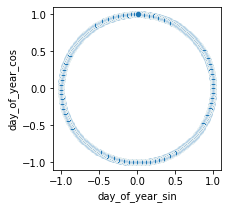

In [79]:
fig = plt.figure(figsize=(3, 3)) 
sns.scatterplot(x='day_of_year_sin', y='day_of_year_cos', data=final)
plt.xlim((-1.1,1.1))
plt.ylim((-1.1,1.1))
plt.show()

In [85]:
def plot_date(date):
    fig = plt.figure(figsize=(2, 2)) 
    mask = (final['end_date'] == pd.to_datetime(date))
    sns.scatterplot(x='day_of_year_sin', y='day_of_year_cos', data=final[mask])  
    plt.xlim((-1.1,1.1))
    plt.ylim((-1.1,1.1))
    plt.title(date)

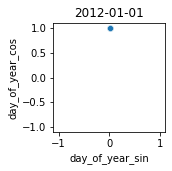

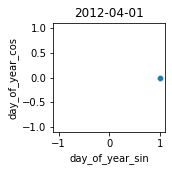

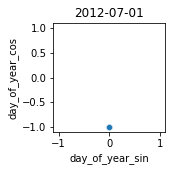

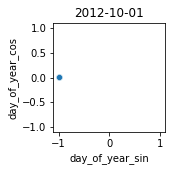

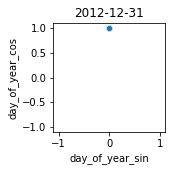

In [88]:
plot_date('2012-01-01')
plot_date('2012-04-01')
plot_date('2012-07-01')
plot_date('2012-10-01')
plot_date('2012-12-31')

#### Add historical Max and Min Temps

In [91]:
def combine_temps(df, temp_target='TN', quality='Q_TN'):
    df.columns = df.columns.str.strip()
    df['DateTime'] = df['DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
    df['JD'] = df['DateTime'].dt.dayofyear
    mt = df[df[quality] == 0]
    mt['temp'] = mt[temp_target]*.1
    return pd.DataFrame(mt.groupby('JD')['temp'].mean()).reset_index()

In [92]:
min_temps = pd.read_csv('./data/ECA_blended_custom_min/TN_STAID000212.txt',skiprows=range(18), sep=',')
min_temps = combine_temps(min_temps, temp_target='TN', quality='Q_TN')

max_temps = pd.read_csv('./data/ECA_blended_custom_max/TX_STAID000212.txt',skiprows=range(18), sep=',')
max_temps = combine_temps(max_temps, temp_target='TX', quality='Q_TX')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [117]:
temps = max_temps.rename(columns={'temp':'max_temp'}).merge(min_temps.rename(columns={'temp':'min_temp'}), on='JD')
temps.head()

,JD,max_temp,min_temp
0,1,8.766667,1.788095
1,2,8.728571,1.430952
2,3,8.619048,1.229268
3,4,9.092857,1.529268
4,5,8.004762,0.605128


In [ ]:
final['JD'] = final['end_date'].dt.dayofyear

print(final.shape)
final_w_temp = final.merge(temps, how='inner', on='JD').copy()
print(final_w_temp.shape)

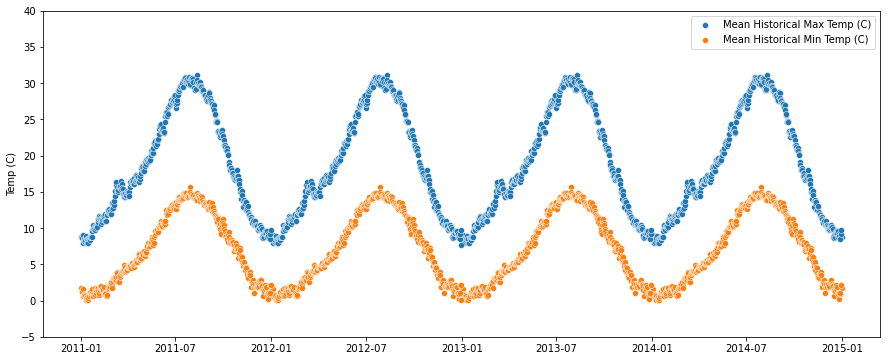

In [116]:
fig = plt.figure(figsize=(15, 6)) 
sns.scatterplot(x='end_date', y='max_temp', label='Mean Historical Max Temp (C)', data=final_w_temp[
    ['end_date', 'max_temp']].drop_duplicates())
sns.scatterplot(x='end_date', y='min_temp', label='Mean Historical Min Temp (C)', data=final_w_temp[
    ['end_date', 'min_temp']].drop_duplicates())

plt.ylim((-5, 40))
plt.ylabel('Temp (C)')
plt.xlabel('')
plt.show()

In [119]:
final_w_temp.head()

,start_time,end_time,end_date,day_pod,user_id,total_consumption,total_ff_values,time_points_in_period,day_of_year_sin,day_of_year_cos,JD,max_temp,min_temp
0,2010-12-31 19:00:00,2011-01-01 07:00:00,2011-01-01,0,MT_124,1952.153110,0,27,0.017166,0.999853,1,8.766667,1.788095
1,2010-12-31 19:00:00,2011-01-01 07:00:00,2011-01-01,0,MT_131,7708.333333,0,27,0.017166,0.999853,1,8.766667,1.788095
2,2010-12-31 19:00:00,2011-01-01 07:00:00,2011-01-01,0,MT_132,1156.107120,0,27,0.017166,0.999853,1,8.766667,1.788095
3,2010-12-31 19:00:00,2011-01-01 07:00:00,2011-01-01,0,MT_156,1843.986276,0,27,0.017166,0.999853,1,8.766667,1.788095
4,2010-12-31 19:00:00,2011-01-01 07:00:00,2011-01-01,0,MT_158,1047.192513,0,27,0.017166,0.999853,1,8.766667,1.788095


In [120]:
final_w_temp.to_csv('./data/portugal_energy_clean.csv', index=None)